In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import math, random

In [2]:
%matplotlib inline

In [3]:
env = gym.make("MountainCarContinuous-v0")

In [4]:
initial_state = env.reset()

In [5]:
def step(env, action):
    state, reward, final, info = env.step(action)
    return state, reward, final, info

In [6]:
env.observation_space.shape, env.observation_space.low, env.observation_space.high

((2,), array([-1.2 , -0.07]), array([0.6 , 0.07]))

In [7]:
def featurize_state(state):
    return np.array([state[0], state[0]**2, state[0]**3, state[0]**4, state[0]**5,
                    state[1], state[1]**2, state[1]**3, state[1]**4, state[1]**5])

def action_space(env):
    env.action_space.low()

In [8]:
def actions(env):
    return np.linspace(env.action_space.low, env.action_space.high, 10)

In [14]:
type(env.action_space)

gym.spaces.box.Box

In [17]:
env.action_space.

Box(1,)

In [9]:
state = env.observation_space.sample()
state = featurize_state(state)

def init_weights():
    state = env.observation_space.sample()
    state = featurize_state(state)
    return np.random.uniform(-1/np.sqrt(state.shape[0]),
                            1/np.sqrt(state.shape[0]),
                            (actions(env).shape[0], state.shape[0]))
weights = init_weights()

def q(state, action_idx):
    state = featurize_state(state)
    return np.dot(weights[action_idx], state)

In [10]:
num_actions = len(actions(env))
def select_action(state, greedy=0.2):
    state = featurize_state(state)
    max_arg = np.dot(weights, state).argmax()
    
    if np.random.uniform() < 1 - greedy:
        return max_arg
    else:
        return random.randint(0, num_actions-1)

In [27]:
state = env.reset()
weights = init_weights()
action = None
done = False

In [29]:
lr = learning_rate = 0.01
df = discount_factor = 1

episodes = []
iterations = []


for i in range(50):
    count = 0
    state = env.reset()
    done = False
    action = None
    
    while not done:
        count += 1
        # if count >= 300: raise Exception("yay")
        if action is None:
            action = select_action(state)

        next_state, reward, done, _ = step(env, [actions(env)[action]])
        
        if done:
            w = weights[action]
            w = w + lr*(reward - q(state, action))*featurize_state(state)
            weights[action] = w
            break
            
        next_action = select_action(next_state)
        w = weights[action]

        w = w + lr*(reward + df*q(next_state, next_action) - q(state, action))*featurize_state(state)

        weights[action] = w

        action = next_action
        state = next_state
        # env.render()
        
    episodes.append(i)
    iterations.append(count)
    env.render()

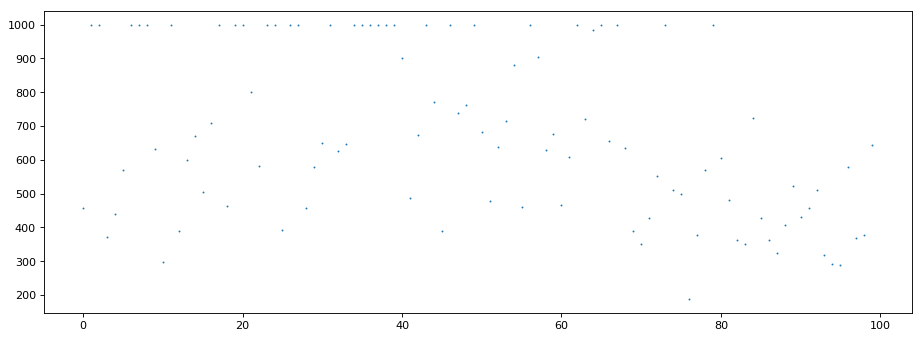

In [17]:
plt.figure(figsize=(14, 5), dpi=80)
plt.scatter(episodes, iterations, s=0.5)
#plt.hist(iterations, bins=100)
None

In [120]:
count, weights

(999, array([[-0.02085557,  0.0595762 ,  0.11831713, -0.18363152, -0.19683867,
         -0.01796869,  0.28806498, -0.021476  ,  0.24860996,  0.18516945],
        [ 0.01440559, -0.05804852, -0.22202222, -0.2264345 , -0.07399336,
          0.0836368 ,  0.03485213,  0.13657303, -0.18549418,  0.08907543],
        [-0.08892545, -0.23147879, -0.16591371, -0.0597599 , -0.0296756 ,
          0.0452843 , -0.16806746,  0.11934212,  0.05252277,  0.08751585],
        [ 0.00821088, -0.05516365, -0.10181619, -0.01925168,  0.0219685 ,
          0.09394311,  0.27535469, -0.22059754,  0.14107741,  0.07010356],
        [-0.036048  , -0.08865107, -0.11465601, -0.16514499, -0.0954818 ,
          0.15807466, -0.01672393,  0.20743621,  0.02093894,  0.29951216],
        [-0.03579179, -0.01706876,  0.1083824 , -0.00311162, -0.07572744,
          0.22687012,  0.1699998 ,  0.25096862,  0.01865831,  0.17707882],
        [-0.10621423, -0.29940879, -0.25072268, -0.12465697, -0.05695309,
          0.05062194,  0.12

In [90]:
if False:
    np.save("weights", weights)

In [12]:
if True:
    weights = np.load("weights.npy")